In [1]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
sns.set(style="darkgrid")

In [2]:
args= argparse.Namespace(
    
    loc = '../data/'
)

In [3]:
!ls ../data/train

english_dataset.tsv german_dataset.tsv  hindi_dataset.tsv


In [4]:
!ls ../data/gold

english_data.tsv german_data.tsv  hindi_data.tsv


In [5]:
ENGLISH_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','english_data.tsv'),
    sep='\t'
)
HINDI_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','hindi_data.tsv'),
    sep='\t'
)
GERMAN_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','german_data.tsv'),
    sep='\t'
)

In [6]:
ENGLISH_TRAIN = pd.read_csv(
    os.path.join(args.loc,'train','english_dataset.tsv',),
    sep='\t'
)
HINDI_TRAIN = pd.read_csv(
    os.path.join(args.loc,'train','hindi_dataset.tsv',),
    sep='\t'
)
GERMAN_TRAIN = pd.read_csv(
    os.path.join(args.loc,'train','german_dataset.tsv',),
    sep='\t'
)

# English Train Set

In [7]:
ENGLISH_TRAIN

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE
...,...,...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",HOF,PRFN,UNT
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,NOT,NONE,NONE
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,HOF,OFFN,TIN
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,HOF,OFFN,UNT


In [8]:
with pd.option_context('display.max_colwidth', -1): 
    print(ENGLISH_TRAIN.sample(5))

            text_id  \
1810  hasoc_en_1811   
4273  hasoc_en_4274   
1508  hasoc_en_1509   
1711  hasoc_en_1712   
1666  hasoc_en_1667   

                                                                                                                                                                                                                                                                                                                text  \
1810  500 doctors have already resigned in Bengal.    NRS 100  SSKM 175  National medical college 20  RG Kar 126  North Bengal college 119  Murshidabad 50  Rampurhat 37  Burdwan 26    #DoctorsFightBack #doctors_against_assualt   #doctors_against_assualt                                                          
4273  Dear @ICC you may try removing the Army insignia from @msdhoni's Glove,  But you can not remove his love for nation from his heart!  We people of India are with Dhoni always ❤🇮🇳 #IndiaWithDhoni  #DhoniKeepsTheGlove #BalidanBadge ht

In [9]:
ENGLISH_TRAIN.text.map(len).describe()

count    5852.000000
mean      178.698565
std        82.459246
min        14.000000
25%       113.000000
50%       170.000000
75%       247.000000
max       991.000000
Name: text, dtype: float64

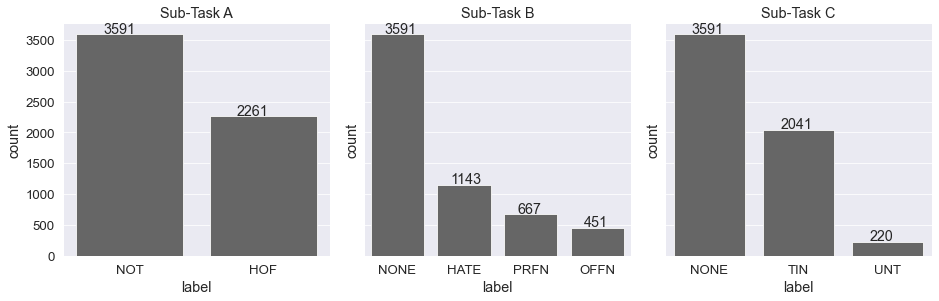

In [10]:
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(13, 4))
    axes2 = ax2.flatten()
    fig2.tight_layout()

    subplot_titles = ['Sub-Task A','Sub-Task B','Sub-Task C']

    _dfs = [
        ENGLISH_TRAIN['task_1'] ,
        ENGLISH_TRAIN['task_2'] ,  
        ENGLISH_TRAIN['task_3'] ,  
    ]
    for i,df in enumerate(_dfs):

        axp  = sns.countplot(df,ax = axes2[i], color=("0.4"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+24))

    fig2.savefig(
        'images/english_train_countplot.pdf', format='pdf', dpi=600
    )

# English Test Set

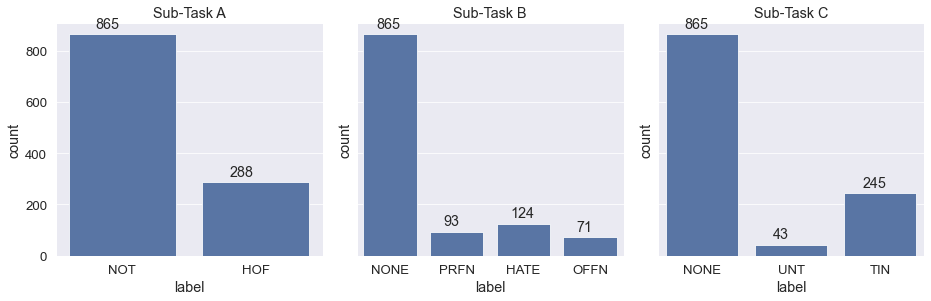

In [11]:
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(13, 4))
    axes2 = ax2.flatten()
    fig2.tight_layout()

    subplot_titles = ['Sub-Task A','Sub-Task B','Sub-Task C']

    _dfs = [
        ENGLISH_GOLD['task_1'] ,
        ENGLISH_GOLD['task_2'] ,  
        ENGLISH_GOLD['task_3'] ,  
    ]
    for i,df in enumerate(_dfs):

        axp  = sns.countplot(df,ax = axes2[i], color=("b"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+24))

    fig2.savefig(
        'images/english_gold_countplot.pdf', format='pdf', dpi=600
    )

# Hindi Train Set

In [12]:
HINDI_TRAIN

,text_id,text,task_1,task_2,task_3
0,hasoc_hi_5556,"बांग्लादेश की शानदार वापसी, भारत को 314 रन पर ...",NOT,NONE,NONE
1,hasoc_hi_5648,सब रंडी नाच देखने मे व्यस्त जैसे ही कोई #शांती...,HOF,PRFN,UNT
2,hasoc_hi_164,तुम जैसे हरामियों के लिए बस जूतों की कमी है शु...,HOF,PRFN,TIN
3,hasoc_hi_3530,"बीजेपी MLA आकाश विजयवर्गीय जेल से रिहा, जमानत ...",NOT,NONE,NONE
4,hasoc_hi_5206,चमकी बुखार: विधानसभा परिसर में आरजेडी का प्रदर...,NOT,NONE,NONE
...,...,...,...,...,...
4660,hasoc_hi_6606,पाकिस्तान ने हिंदुओं के ख़िलाफ़ बोलने वाले को ...,NOT,NONE,NONE
4661,hasoc_hi_4931,कोहली है #नेहरू नहीं जो अंग्रेजों के तलवे चाटन...,HOF,PRFN,TIN
4662,hasoc_hi_1059,परशुराम? वही जिसने अपनी मां की हत्या की थीं?,NOT,NONE,NONE
4663,hasoc_hi_5429,जिस देश में #कन्हैया_कुमार जैसा पढ़ा लिखा युवा...,HOF,HATE,TIN


In [13]:
with pd.option_context('display.max_colwidth', -1): 
    print(HINDI_TRAIN.sample(5))

            text_id  \
3237  hasoc_hi_6509   
1223  hasoc_hi_6252   
2851  hasoc_hi_2818   
2418  hasoc_hi_3400   
618   hasoc_hi_6620   

                                                                                                                                                                                                                                                                                           text  \
3237  लगातार #HeavyRain से #Mumbai और आसपास के इलाकों में वायु, सड़क और रेल यातायात बुरी तरह प्रभावित हुआ है। वहीं #MumbaiRain की वजह से शहर में बिजली की चपेट में आने से एक व्यक्ति की मौत हो गई, जबकि आकाशीय बिजली गिरने से तीन लोगों की मौत हो गई।                                             
1223  2019 का लोकसभा का चुनाव अब तक के इतिहास में दुनिया का सबसे बड़ा लोकतांत्रिक चुनाव थाः पीएम @narendramodi जी ।  #MannKiBaat                                                                                                                                                       

In [14]:
HINDI_TRAIN.text.map(len).describe()

count    4665.000000
mean      152.538692
std        80.516801
min        19.000000
25%        85.000000
50%       136.000000
75%       221.000000
max       541.000000
Name: text, dtype: float64

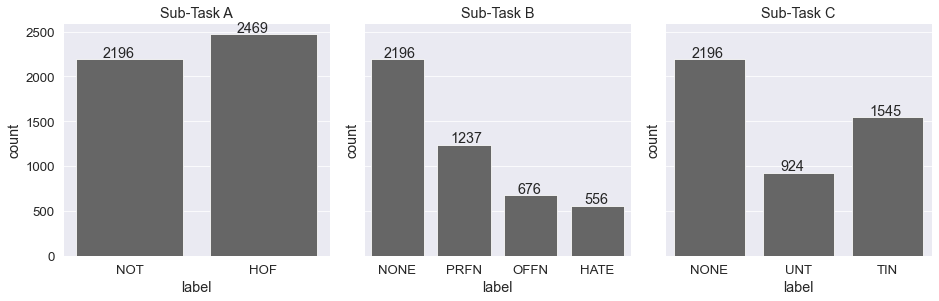

In [15]:
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(13, 4))
    axes2 = ax2.flatten()
    fig2.tight_layout()

    subplot_titles = ['Sub-Task A','Sub-Task B','Sub-Task C']

    _dfs = [
        HINDI_TRAIN['task_1'] ,
        HINDI_TRAIN['task_2'] ,  
        HINDI_TRAIN['task_3'] ,  
    ]
    for i,df in enumerate(_dfs):

        axp  = sns.countplot(df,ax = axes2[i], color=("0.4"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+24))

    fig2.savefig(
        'images/hindi_train_countplot.pdf', format='pdf', dpi=600
    )
        

# Hindi Test Set

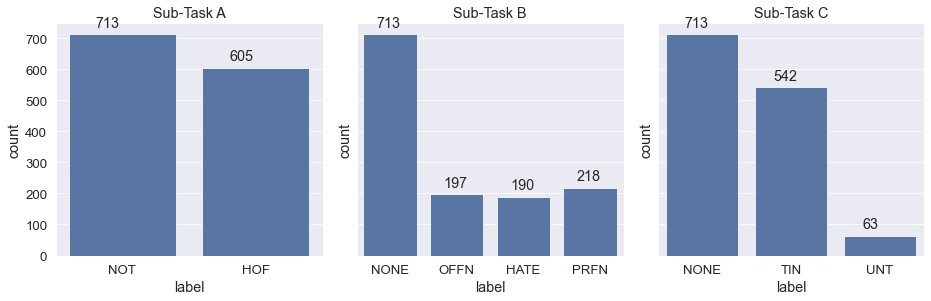

In [16]:
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(13, 4))
    axes2 = ax2.flatten()
    fig2.tight_layout()

    subplot_titles = ['Sub-Task A','Sub-Task B','Sub-Task C']

    _dfs = [
        HINDI_GOLD['task_1'] ,
        HINDI_GOLD['task_2'] ,  
        HINDI_GOLD['task_3'] ,  
    ]
    for i,df in enumerate(_dfs):

        axp  = sns.countplot(df,ax = axes2[i], color=("b"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+24))
                
    fig2.savefig(
        'images/hindi_gold_countplot.pdf', format='pdf', dpi=600
    )

# German Train Set

In [17]:
GERMAN_TRAIN

,text_id,text,task_1,task_2
0,hasoc_de_1,Frank Rennicke – Ich bin stolz https://t.co/Cm...,NOT,NONE
1,hasoc_de_2,ANSEHEN.....und danach bitte TEILEN...TEILEN.....,NOT,NONE
2,hasoc_de_3,#Koeln Mohamed erkennt kein deutsches Recht so...,NOT,NONE
3,hasoc_de_4,#SaudiArabien ist eine brutale islamische Dikt...,NOT,NONE
4,hasoc_de_5,Bundespolizei #München hat im 1. Quartal 2019 ...,NOT,NONE
...,...,...,...,...
3814,hasoc_de_3815,"akquirieren Männer,die sich um die Kinder kümm...",NOT,NONE
3815,hasoc_de_3816,"Ja,schon seit Jahren! Ich muß dran denken,das...",NOT,NONE
3816,hasoc_de_3817,@Kurkamp @wendt_joachim @Schroeder_Live @lamni...,NOT,NONE
3817,hasoc_de_3818,EU Wahlen! AfD für Kindererziehungszeiten für...,NOT,NONE


In [18]:
with pd.option_context('display.max_colwidth', -1): 
    print(GERMAN_TRAIN.sample(5))

            text_id  \
3522  hasoc_de_3523   
1962  hasoc_de_1963   
5     hasoc_de_6      
1850  hasoc_de_1851   
1968  hasoc_de_1969   

                                                                                                                                                                                                                                                                                                                       text  \
3522  Die #Grünen.  Wollen gewählt werden. Versprechen: ... heiße 💨  Robert #Habeck faselt von #ZusammenhaltWählen  Sonst:  📢 'Es gibt kein Volk.'  'Mit #Deutschland weiß ich nichts anzufangen.' 🤔  Verbote + Bevormundung + Verbote  WER wählt sowas??👎#Europawahl2019 https://t.co/MYXIjuQlPW                             
1962  GRÜNE stärkste Partei? Meine Antwort: Die Zerstörung der Grünen! https://t.co/FnFfoxUR7L https://t.co/MAou8RMa4J                                                                                                         

In [19]:
GERMAN_TRAIN.text.map(len).describe()

count    3819.000000
mean      174.816968
std        86.022304
min         6.000000
25%       101.000000
50%       168.000000
75%       262.000000
max       507.000000
Name: text, dtype: float64

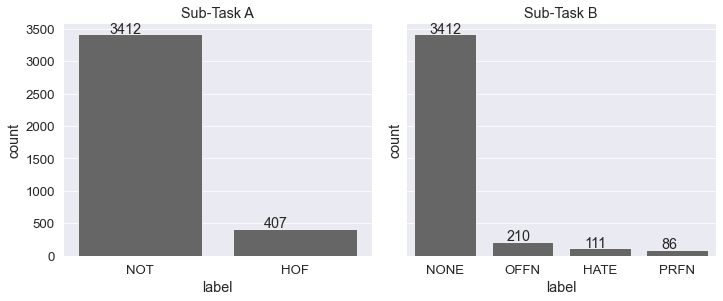

In [20]:
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=2,sharey = True, figsize=(10, 4))
    axes2 = ax2.flatten()
    fig2.tight_layout()

    subplot_titles = ['Sub-Task A','Sub-Task B',]

    _dfs = [
        GERMAN_TRAIN['task_1'] ,
        GERMAN_TRAIN['task_2'] ,    
    ]
    for i,df in enumerate(_dfs):

        axp  = sns.countplot(df,ax = axes2[i], color=("0.4"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+24))

    fig2.savefig(
        'images/german_train_countplot.pdf', format='pdf', dpi=600
    )

# German Test Set

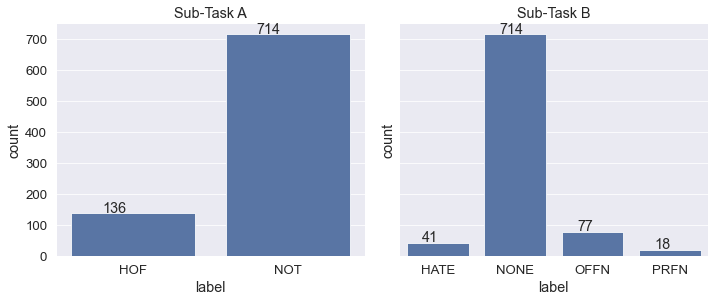

In [21]:
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=2,sharey = True, figsize=(10, 4))
    axes2 = ax2.flatten()
    fig2.tight_layout()

    subplot_titles = ['Sub-Task A','Sub-Task B']

    _dfs = [
        GERMAN_GOLD['task_1'] ,
        GERMAN_GOLD['task_2'] ,    
    ]
    for i,df in enumerate(_dfs):

        axp  = sns.countplot(df,ax = axes2[i], color=("b"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+5))

    fig2.savefig(
        'images/german_gold_countplot.pdf', format='pdf', dpi=600
    )